# The analytic bang-bang solution

  
## Reach of the target

Let $t$ be the time variable, $T$ the time (in $s$) when the target is pointed, $x(t)$ and $\dot{x}(t)$ respectively the position and the velocity at time $t$, $x_T$ the position to reach, $\rho \in \left [0 ,1\right]$.  
$x(t=0) = 0$ and $\dot{x}(t=0) = 0$  
  
$\newcommand{\intervalle}[2]{\left[#1\mathclose{}\mathpunct{};#2\right]}
\newcommand{\intervallefo}[2]{\left[#1\mathclose{}\mathpunct{};#2\right[}
\newcommand{\intervalleof}[2]{\left]#1\mathclose{}\mathpunct{};#2\right]}
\newcommand{\intervalleoo}[2]{\left]#1\mathclose{}\mathpunct{};#2\right[}$  
$\forall t \in \intervalle{0}{\rho\cdot T} : u(t) = U_+$  
$\forall t \in \intervalleof{\rho\cdot T}{T} : u(t) = U_-$  
$\forall t \in \intervalleoo{T}{+\infty} : u(t) = U_{\infty}$  
  
Formally, 
$$
u(t) = \mathbb 1_{\intervalle{0}{\rho\cdot T}} \cdot U_+ + \mathbb 1_{\intervalleof{\rho\cdot T}{T}} \cdot U_- + \mathbb 1_{\intervalleoo{T}{+\infty}} \cdot U_\infty
$$

where $\mathbb 1_{\mathcal{I}}$ is the [indicator function](https://en.wiktionary.org/wiki/indicator_function#English) of the interval $\mathcal{I}$
  
We will solve the following differential equation, which represents a linear model of the eye, on the previous intervals:  
  
$$
\dfrac{d\dot{x}(t)}{dt} = -\frac{1}{\tau}\cdot\dot{x}(t)+u(t)
$$

where $\tau$ is a constant of the eye, with $\left[\tau\right] = s$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
tau = 0.013
xT = 10
dt = 0.0001
t_T = .05
t_R = .05
T = int(t_T/dt)
R = int(t_R/dt)
time = np.linspace(0, t_T+t_R, R+T+1)
time_ms = time*1000
v0 = 5. #velocity of the target

On $\intervalle{0}{\rho\cdot T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{1}{\tau}\cdot\dot{x}(t)+U_+$  
  
We find:  $\dot{x}(t) = U_+\cdot\tau\left (1-e^{- \frac{t}{\tau}} \right )$ and so : $x(t) = U_+\cdot\tau\left [t-\tau\left(1-e^{- \frac{t}{\tau}} \right )\right]$

On $\intervalleof{\rho\cdot T}{T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{1}{\tau}\cdot\dot{x}(t)+U_-$  
  
We find:  $\dot{x}(t) = U_-\cdot\tau\left (1-e^{\frac{T-t}{\tau}} \right )$ and so : $x(t) = x_T - U_-\cdot\tau\left [T-t+\tau\left(1-e^{\frac{T-t}{\tau}} \right )\right]$
 

On $\intervalleoo{T}{+\infty}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{1}{\tau}\cdot\dot{x}(t)+U_{\infty}$  
  
We find:  $U_{\infty} = 0$ since $\forall t \in \intervalleoo{T}{+\infty}, \dot{x}(t) = 0$ (and $\ddot{x}(t) = 0$) and so : $x(t) = x_T$
 

Then, we use the continuity of the velocity at time $\rho\cdot T$ to find relations between $U_+$, $U_-$ and $\rho$.  
  
We assume that $U_+ = U_{MAX}$ and $U_- = - U_{MAX}$.  
  
We deduce : $\dot{x}(\rho T) = U_{MAX}\cdot\tau\left(1-e^{- \frac{\rho T}{\tau}} \right ) = -U_{MAX}\cdot\tau\left(1-e^{\frac{\left(1-\rho\right)T}{\tau}} \right )$.  
  
Finally: $\rho = -\dfrac{\tau}{T}\ln \left(\dfrac{2}{1+e^{\frac{T}{\tau}}}\right)$

In [38]:
rho = tau/t_T*np.log((1+np.exp(t_T/tau))/2)
rhoT = int(np.round(T*rho))

The continuity of the position at time $\rho\cdot T $ enables to find $U_{MAX}: U_{MAX} = \dfrac{1}{\tau}\dfrac{1}{\left (2\rho-1\right)T-\tau\left(2-e^{-\frac{\rho T}{\tau}} - e^{\frac{\left(1-\rho \right)T}{\tau}}\right)} \cdot  x_T$

Note: since the relation is linear, trajectories are linear in 2D for any target's position.

In [39]:
Umax = 1/tau*xT/((2*rho-1)*t_T-tau*(2-np.exp(-rho*t_T/tau)-np.exp((1-rho)*t_T/tau)))

In [40]:
x = np.concatenate((Umax*tau*(time[0:rhoT]-tau*(1-np.exp(-1/tau*time[0:rhoT]))),xT+Umax*tau*(t_T-time[rhoT:T]+tau*(1-np.exp(1/tau*(t_T-time[rhoT:T])))),xT*np.ones(R+1)))
v = np.concatenate((Umax*tau*(1-np.exp(-1/tau*time[0:rhoT])),-Umax*tau*(1-np.exp(1/tau*(t_T-time[rhoT:T]))),np.zeros(R+1)))
u = np.concatenate((Umax*np.ones(rhoT),-Umax*np.ones(T-rhoT),np.zeros(R+1)))

In [41]:
u

array([ 23648.46184793,  23648.46184793,  23648.46184793, ...,
            0.        ,      0.        ,      0.        ])

In [42]:
help(plt.step)

Help on function step in module matplotlib.pyplot:

step(x, y, *args, **kwargs)
    Make a step plot.
    
    Call signature::
    
      step(x, y, *args, **kwargs)
    
    Additional keyword args to :func:`step` are the same as those
    for :func:`~matplotlib.pyplot.plot`.
    
    *x* and *y* must be 1-D sequences, and it is assumed, but not checked,
    that *x* is uniformly increasing.
    
    Keyword arguments:
    
    *where*: [ 'pre' | 'post' | 'mid'  ]
      If 'pre', the interval from x[i] to x[i+1] has level y[i+1]
    
      If 'post', that interval has level y[i]
    
      If 'mid', the jumps in *y* occur half-way between the
      *x*-values.
    
    
    
    Additional kwargs: hold = [True|False] overrides default hold state



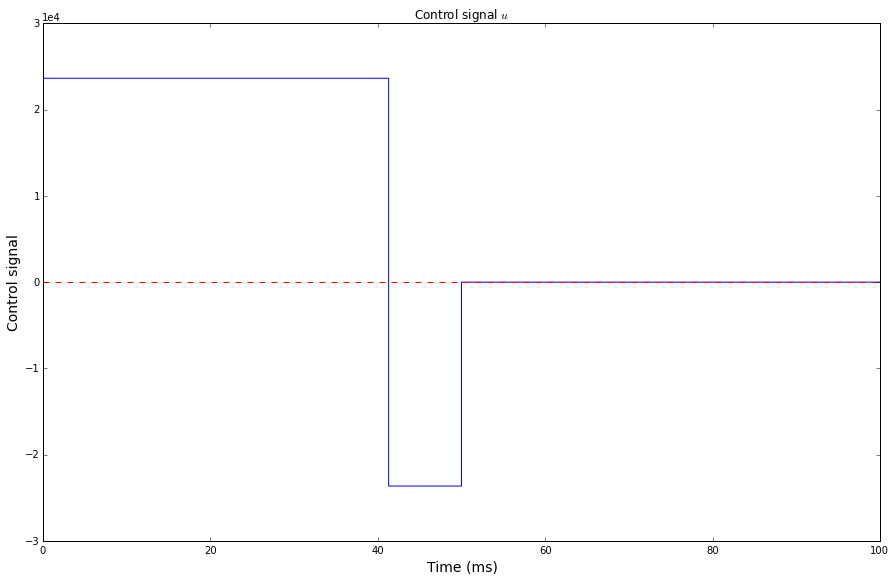

In [43]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.step(time_ms, u, '-', where = 'post')
ax.plot([0,(t_T+t_R)*1000],[0,0], 'r--')
ax.set_title(r'Control signal $u$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Control signal', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))
#ax.set_xlim(0, 150)


(-0.5, 10.5)

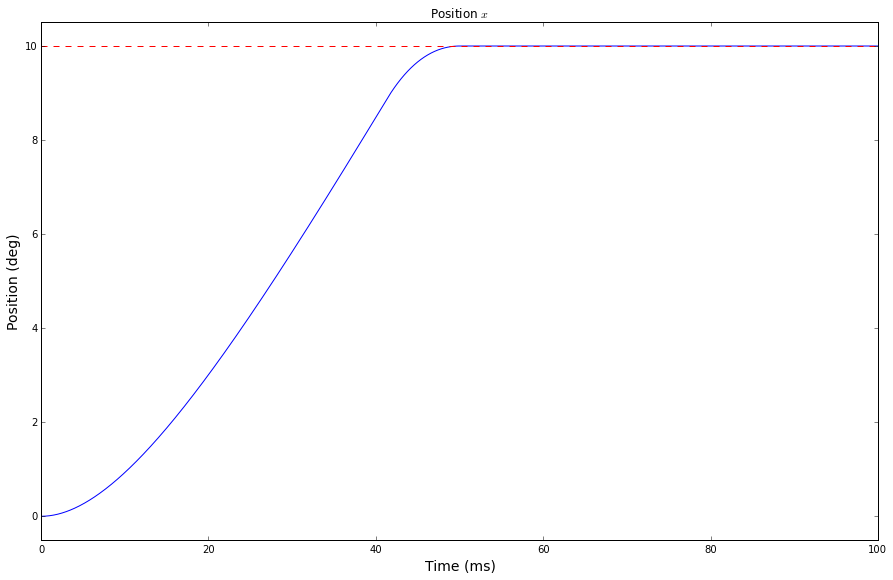

In [44]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, x, '-')
ax.plot([0,(t_T+t_R)*1000],[xT,xT], 'r--')
ax.set_title(r'Position $x$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Position (deg)', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))

ax.set_ylim(-0.5, xT+0.5)


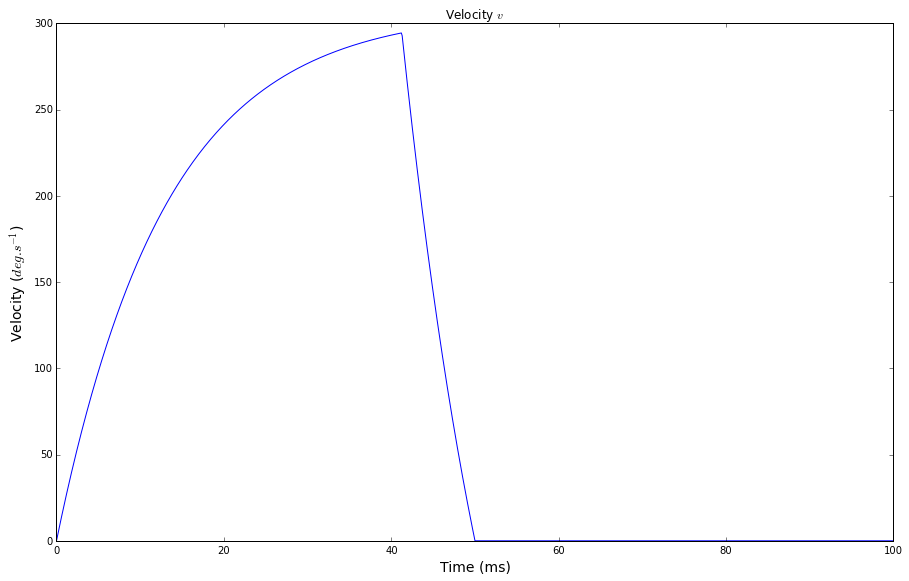

In [45]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, v, '-')
ax.plot([0,(t_T+t_R)*1000],[0,0], 'r--')

ax.set_title(r'Velocity $v$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel(r'Velocity ($deg.s^{-1}$)', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))


## Reach and pursuit of the target

Here, the target is moving with the velocity $v$. We want to reach the moving target (which position at time $t$ is $x_T+v t$ and then follow it. 

Again, 
$$
u(t) = \mathbb 1_{\intervalle{0}{\rho\cdot T}} \cdot U_+ + \mathbb 1_{\intervalleof{\rho\cdot T}{T}} \cdot U_- + \mathbb 1_{\intervalleoo{T}{+\infty}} \cdot U_\infty
$$

We will solve the following differential equation, which represents a linear model of the eye, on the previous intervals:  
  
$$
\dfrac{d\dot{x}(t)}{dt} = -\frac{1}{\tau}\cdot\dot{x}(t)+u(t)
$$

On $\intervalle{0}{\rho\cdot T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{1}{\tau}\cdot\dot{x}(t)+U_+$  
  
We find:  $\dot{x}(t) = U_+\cdot\tau\left (1-e^{- \frac{t}{\tau}} \right )$ and so : $x(t) = U_+\cdot\tau\left [t-\tau\left(1-e^{- \frac{t}{\tau}} \right )\right]$

On $\intervalleof{\rho\cdot T}{T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{1}{\tau}\cdot\dot{x}(t)+U_-$  
  
We find:  $\dot{x}(t) = U_-\cdot\tau\left (1-e^{\frac{T-t}{\tau}} \right ) + v\cdot e^{\frac{T-t}{\tau}}$ and so : $x(t) = x_T +v\cdot T- U_-\cdot\tau\left [T-t+\tau\left(1-e^{\frac{T-t}{\tau}} \right )\right] + v\cdot \tau\left(1-e^{\frac{T-t}{\tau}} \right )$

On $\intervalleoo{T}{+\infty}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{1}{\tau}\cdot\dot{x}(t)+U_{\infty}$  
  
We find:  $U_{\infty} = \dfrac{1}{\tau}\cdot v$ since $\forall t \in \intervalleoo{T}{+\infty}, \dot{x}(t) = v$ (and $\ddot{x}(t) = 0$) and so : $x(t) = v\cdot \left ( t - T \right)+x_T+v\cdot T$

Then, we use the continuity of the velocity at time $\rho\cdot T$ to find relations between $U_+$, $U_-$ and $\rho$.  
  
We assume that $U_+ = U_{MAX}$ and $U_- = - U_{MAX}$.  
  
We deduce : $\dot{x}(\rho T) = U_{MAX}\cdot\tau\left(1-e^{- \frac{\rho T}{\tau}} \right ) = -U_{MAX}\cdot\tau\left(1-e^{\frac{\left(1-\rho\right)T}{\tau}} \right )+v\cdot e^{\frac{\left(1-\rho\right)T}{\tau}}$.  
  
Finally: $U_{MAX} = -\dfrac{\frac{1}{\tau} \cdot v \cdot e^{\frac{\left(1-\rho\right)T}{\tau}}}{2-e^{-\frac{\rho T}{\tau}}-e^{\frac{\left(1-\rho\right)T}{\tau}}}$


The continuity of the position at time $\rho \cdot T$ enables to find the value of $\rho$.
Indeed, $\rho$ is the unique solution in $\intervalle{0}{1}$ of :
$$
\left(x_T+v\cdot T \right)\left(2-e^{-\frac{\rho T}{\tau}}-e^{\frac{\left(1-\rho\right)T}{\tau}}\right) +v\cdot\tau\left(1-e^{\frac{\left(1-\rho\right)T}{\tau}}\right)\left(2-e^{-\frac{\rho T}{\tau}}-e^{\frac{\left(1-\rho\right)T}{\tau}}\right)-v\cdot e^{\frac{\left(1-\rho\right)T}{\tau}}\left [\left(2\rho-1\right)T-\tau\left(2-e^{-\frac{\rho T}{\tau}}-e^{\frac{\left(1-\rho\right)T}{\tau}} \right )\right] = 0
$$

Numerically, we find $\rho$, and then we deduce $U_{MAX}$, which enables to compute the position and the velocity of the bangbang.

(0.5, 1)

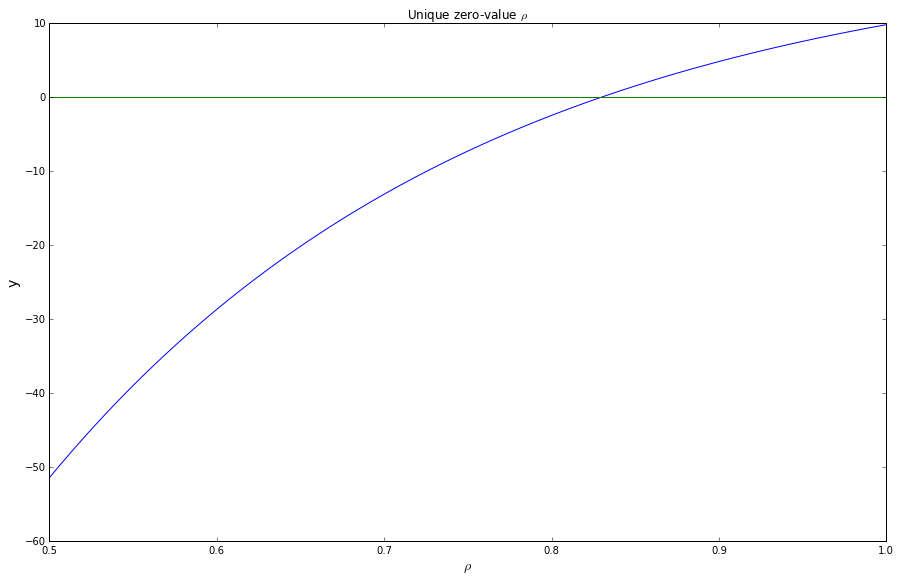

In [46]:
vrho = np.linspace(0.5,1,1000001)
y = (xT+v0*t_T+v0*tau*(1-np.exp((1-vrho)*t_T/tau)))*(2-np.exp(-vrho*t_T/tau)-np.exp((1-vrho)*t_T/tau))+v0*np.exp((1-vrho)*t_T/tau)*((1-vrho)*t_T+tau*(1-np.exp((1-vrho)*t_T/tau)))-v0*np.exp((1-vrho)*t_T/tau)*(vrho*t_T-tau*(1-np.exp(-vrho*t_T/tau)))

fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ax.plot(vrho,y)
ax.plot([0.5,1],[0,0])
ax.set_title(r'Unique zero-value $\rho$')
ax.set_xlabel(r'$\rho$', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_xlim(0.5, 1)


In [47]:
rho_pursuit = vrho[np.argmin(np.abs(y))]
Umax_pursuit = 1/tau*v0*np.exp((1-rho_pursuit)*t_T/tau)/(2-np.exp((1-rho_pursuit)*t_T/tau)-np.exp(-rho_pursuit*t_T/tau))
rhoT_pursuit = int(np.round(T*rho_pursuit))

In [48]:
Umax_pursuit

24093.8274761961

In [49]:
x_pursuit = np.concatenate((Umax_pursuit*tau*(time[0:rhoT_pursuit]-tau*(1-np.exp(-1/tau*time[0:rhoT_pursuit]))),xT+v0*t_T+Umax_pursuit*tau*(t_T-time[rhoT_pursuit:T]+tau*(1-np.exp(1/tau*(t_T-time[rhoT_pursuit:T]))))+tau*v0*(1-np.exp(1/tau*(t_T-time[rhoT_pursuit:T]))),xT+v0*t_T+v0*(time[T:(T+R+1)]-t_T)))
v_pursuit = np.concatenate((Umax_pursuit*tau*(1-np.exp(-1/tau*time[0:rhoT_pursuit])),-Umax_pursuit*tau*(1-np.exp(1/tau*(t_T-time[rhoT_pursuit:T])))+v0*np.exp(1/tau*(t_T-time[rhoT_pursuit:T])),v0*np.ones(R+1)))
u_pursuit = np.concatenate((Umax_pursuit*np.ones(rhoT_pursuit),-Umax_pursuit*np.ones(T-rhoT_pursuit),1/tau*v0*np.ones(R+1)))

In [50]:
u_pursuit

array([ 24093.8274762 ,  24093.8274762 ,  24093.8274762 , ...,
          384.61538462,    384.61538462,    384.61538462])

(-35000, 35000)

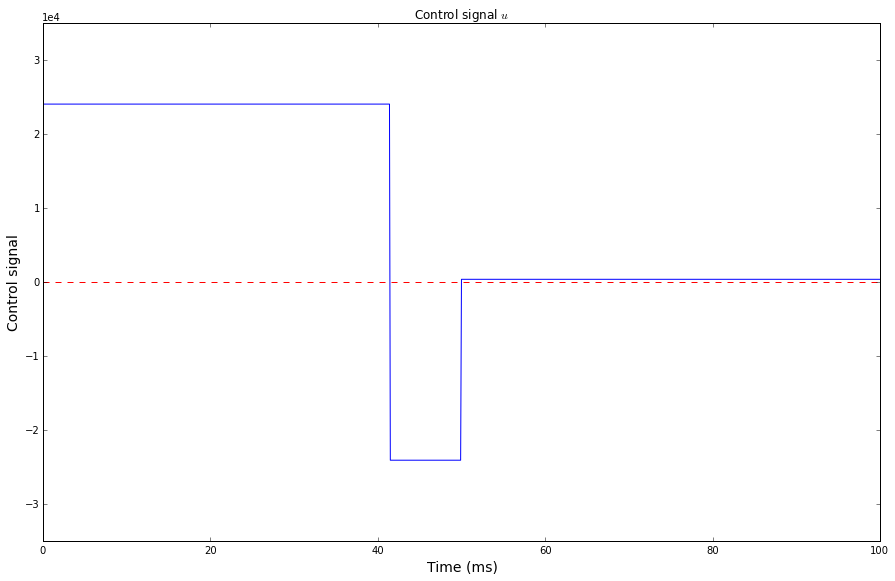

In [51]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, u_pursuit, '-')
ax.plot([0,(t_T+t_R)*1000],[0,0], 'r--')
ax.set_title(r'Control signal $u$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Control signal', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))
ax.set_ylim(-35000, 35000)


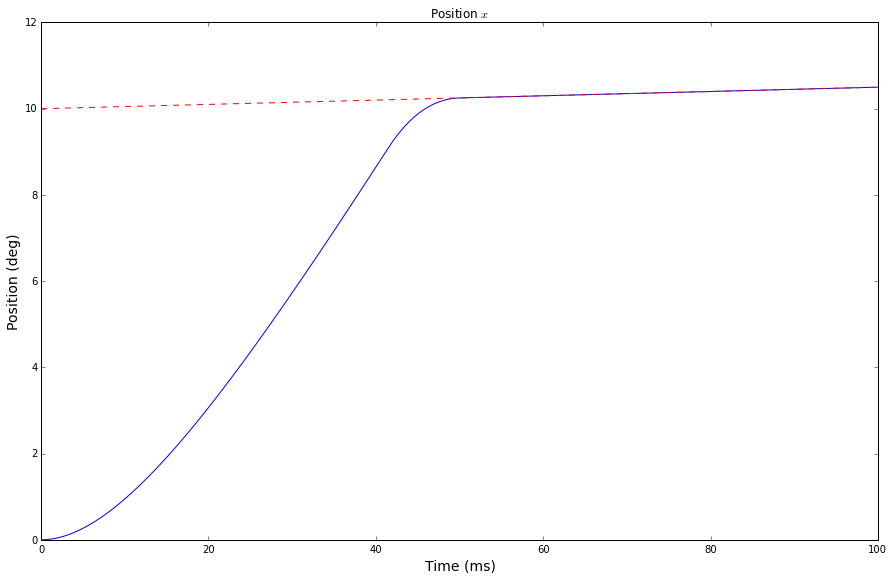

In [52]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, x_pursuit, '-')
ax.plot([0,(t_T+t_R)*1000],[xT,xT+v0*(t_T+t_R)], 'r--')
ax.set_title(r'Position $x$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Position (deg)', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))

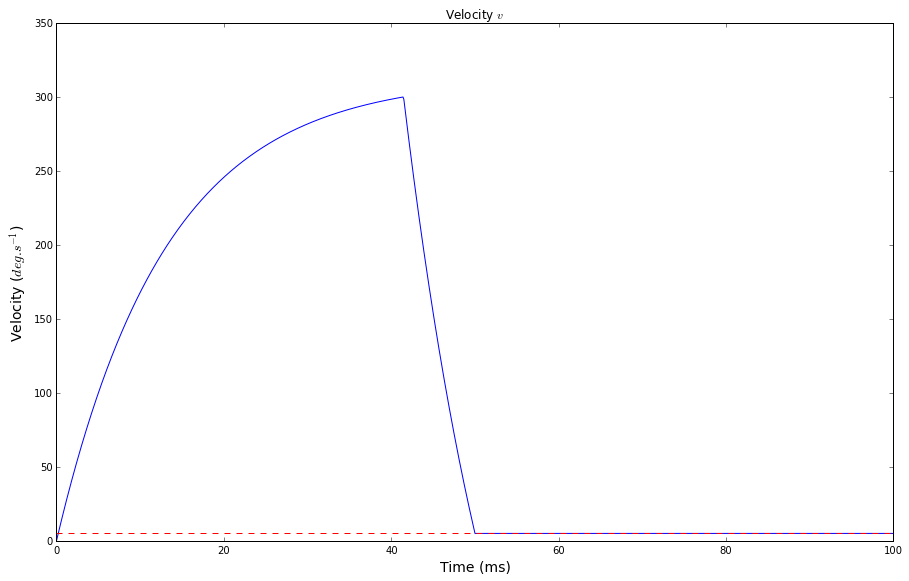

In [53]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, v_pursuit, '-')
ax.set_title(r'Velocity $v$')
ax.plot([0,(t_T+t_R)*1000],[v0,v0], 'r--')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel(r'Velocity ($deg.s^{-1}$)', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))
